In [1]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime

passengers_data = pd.read_csv('passengers_0.csv')
passengers_data['ArrivalTime'] = pd.to_datetime(passengers_data['ArrivalTime'], unit='s')

time_interval_minutes = 15

arrival_counts = passengers_data['ArrivalTime'].dt.floor(f'{time_interval_minutes}T').value_counts()
arrival_counts = arrival_counts.sort_index()
arrival_counts

time_range = pd.date_range(start='1970-01-01 00:00:00', end='1970-01-01 12:00:00', freq=f'{time_interval_minutes}T')

arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
arrival_df['TimePeriod'] = arrival_df.index
arrival_df.loc[arrival_counts.index, 'ArrivalCount'] = arrival_counts.values
arrival_df.reset_index(drop=True, inplace=True)
arrival_df = arrival_df[["TimePeriod", "ArrivalCount"]]

security_data = pd.read_csv('security.csv')
security_data['Time'] = pd.to_datetime(security_data['Time'], unit='s')

# Merge security_data and arrival_df based on the 'Time' column
merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')
# Drop unnecessary columns, if needed
merged_data.drop(columns=['TimePeriod'], inplace=True)

# Filter data for the desired time range (before 12:00)
filtered_data = merged_data[merged_data['Time'] <= '1970-01-01 12:00:00']
filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
filtered_data["ExcessPassengers"] = filtered_data.apply(lambda row: max(row["ArrivalCount"] - row["SecurityCapacity"], 0), axis=1)
filtered_data["IdleCapacity"] = filtered_data.apply(lambda row: max(row["SecurityCapacity"] - row["ArrivalCount"], 0), axis=1)
filtered_data = filtered_data[["Time","ArrivalCount","Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity"]] 

filtered_data

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\14399\AppData\Local\Temp/ipykernel_3940/1666864556.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["SecurityCapacity"] = filtered_data["Lanes"]*45
C:\Users\14399\AppData\Local\Temp/ipykernel_3940/1666864556.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
0,1970-01-01 00:00:00,0.0,1,45,0.0,45.0
1,1970-01-01 00:15:00,0.0,1,45,0.0,45.0
2,1970-01-01 00:30:00,0.0,1,45,0.0,45.0
3,1970-01-01 00:45:00,0.0,1,45,0.0,45.0
4,1970-01-01 01:00:00,0.0,1,45,0.0,45.0
5,1970-01-01 01:15:00,0.0,1,45,0.0,45.0
6,1970-01-01 01:30:00,0.0,1,45,0.0,45.0
7,1970-01-01 01:45:00,0.0,1,45,0.0,45.0
8,1970-01-01 02:00:00,0.0,1,45,0.0,45.0
9,1970-01-01 02:15:00,4.0,1,45,0.0,41.0


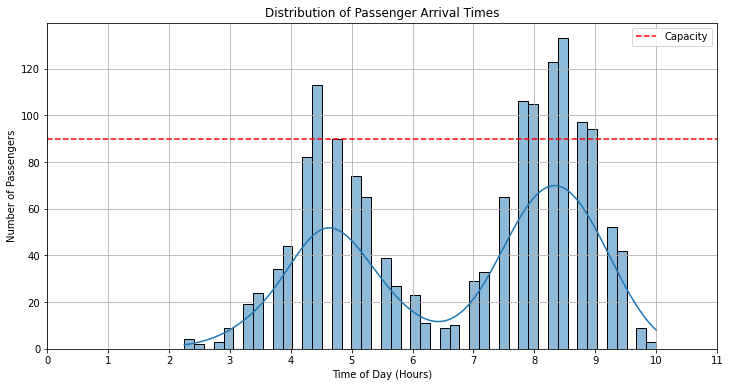

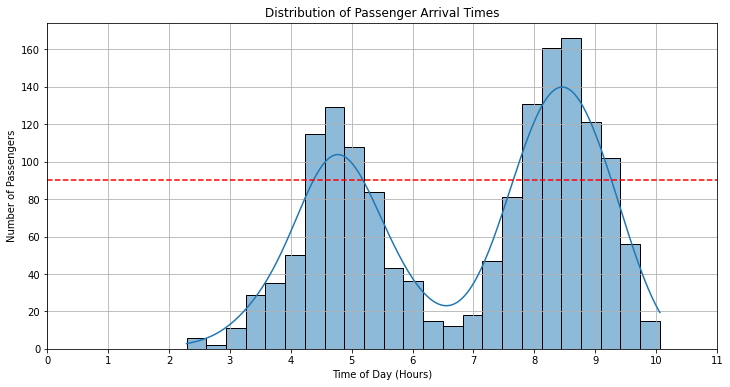

In [2]:
passengers_data = pd.read_csv('passengers_0.csv')

# Align ArrivalTime to the nearest 15-minute interval
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % (15 * 60))

# Plotting histograms
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['AlignedArrivalTime']/3600, bins=12*4, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')
plt.legend()
plt.show()


passengers_data["ArrivalTime_hour"] = passengers_data["ArrivalTime"]/3600
# Plotting the distribution of arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['ArrivalTime_hour'], bins=24, kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=90, color='red', linestyle='--', label='Capacity')

In [3]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

passengers_data = pd.read_csv('passengers_0.csv')
security_data = pd.read_csv('security.csv')
time_interval_seconds = 15*60

# ArrivalCount
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % time_interval_seconds)
arrival_counts = passengers_data['AlignedArrivalTime'].value_counts().sort_index()

time_range = range(0, 12 * 3600 + 1, time_interval_seconds)
arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
arrival_df.index.name = 'TimePeriod'
arrival_df.reset_index(inplace=True)
arrival_df.loc[arrival_df['TimePeriod'].isin(arrival_counts.index), 'ArrivalCount'] = arrival_counts.values


# Merge security_data and arrival_df based on the 'Time' column
merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')

# Calculate ExcessPassengers and IdleCapacity
merged_data['SecurityCapacity'] = merged_data['Lanes'] * 45
merged_data['ExcessPassengers'] = merged_data.apply(lambda row: max(row['ArrivalCount'] - row['SecurityCapacity'], 0), axis=1)
merged_data['IdleCapacity'] = merged_data.apply(lambda row: max(row['SecurityCapacity'] - row['ArrivalCount'], 0), axis=1)

# Period in 04:00 - 10:30
filtered_data = merged_data[(merged_data['Time'] <= 10.5 * 3600) & (merged_data['Time'] >= 4 * 3600)]
peak_data = filtered_data[["Time", 'ArrivalCount', "Lanes", "SecurityCapacity", "ExcessPassengers", "IdleCapacity"]]

warnings.filterwarnings("default")
peak_data

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
16,14400,44.0,2,90,0.0,46.0
17,15300,82.0,2,90,0.0,8.0
18,16200,113.0,2,90,23.0,0.0
19,17100,90.0,2,90,0.0,0.0
20,18000,74.0,2,90,0.0,16.0
21,18900,65.0,2,90,0.0,25.0
22,19800,39.0,2,90,0.0,51.0
23,20700,27.0,2,90,0.0,63.0
24,21600,23.0,1,45,0.0,22.0
25,22500,11.0,1,45,0.0,34.0


In [32]:
warnings.filterwarnings("ignore")

passengers_data = pd.read_csv('passengers_0.csv')
security_data = pd.read_csv('security.csv')

time_interval_seconds = 15*60
time_range = range(0, 12 * 3600 + 1, time_interval_seconds)

# Dictionary to store corresponding dataframe of flight
flight_dfs = {}
for flight_column in passengers_data["FlightNumber"].unique():
    flight_dfs[flight_column] = passengers_data[passengers_data["FlightNumber"] == flight_column].copy()
flight_dfs_list = list(flight_dfs.values())

for df in flight_dfs_list:
    flight_code = df["FlightNumber"].iloc[0]
    
    # ArrivalCount
    df['AlignedArrivalTime'] = df['ArrivalTime'] - (df['ArrivalTime'] % time_interval_seconds)
    arrival_counts = df['AlignedArrivalTime'].value_counts().sort_index()
    
    arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
    arrival_df.index.name = 'TimePeriod'
    arrival_df.reset_index(inplace=True)
    arrival_df.loc[arrival_df['TimePeriod'].isin(arrival_counts.index), 'ArrivalCount'] = arrival_counts.values

    # Merge security_data and arrival_df based on the 'Time' column
    merged_data = pd.merge(security_data, arrival_df, left_on='Time', right_on='TimePeriod', how='left')

    # Calculate ExcessPassengers and IdleCapacity
    merged_data['SecurityCapacity'] = merged_data['Lanes'] * 45
    merged_data['ExcessPassengers'] = merged_data.apply(lambda row: max(row['ArrivalCount'] - row['SecurityCapacity'], 0), axis=1)
    merged_data['IdleCapacity'] = merged_data.apply(lambda row: max(row['SecurityCapacity'] - row['ArrivalCount'], 0), axis=1)

    # Period in 04:00 - 10:30
    filtered_data = merged_data[(merged_data['Time'] <= 10.5 * 3600) & (merged_data['Time'] >= 4 * 3600)]
    peak_data[f'{flight_code}'] = filtered_data['ArrivalCount']

warnings.filterwarnings("default")

peak_data

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity,BM2616,XC6333,OO2037,HP4524,DN7022,QX7315,SS2446,ZI1701,HC1255,HF1818,IG2596
16,14400,90,2,90,0,0,6.0,11.0,21.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
17,15300,82,2,90,0,8,19.0,19.0,25.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
18,16200,42,2,90,0,48,11.0,24.0,49.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
19,17100,90,2,90,0,0,6.0,20.0,36.0,8.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
20,18000,74,2,90,0,16,3.0,16.0,19.0,11.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18900,90,2,90,0,0,0.0,7.0,9.0,16.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0
22,19800,90,2,90,0,0,0.0,1.0,1.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
23,20700,90,2,90,0,0,0.0,0.0,0.0,1.0,24.0,0.0,2.0,0.0,0.0,0.0,0.0
24,21600,45,1,45,0,0,0.0,0.0,0.0,0.0,20.0,0.0,3.0,0.0,0.0,0.0,0.0
25,22500,45,1,45,0,0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,1.0,0.0,0.0,0.0


In [33]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
import warnings
import copy

def get_peak_data(passengers_data, security_data, duration):
    time_interval_seconds = duration*60
    time_range = range(0, 12 * 3600 + 1, time_interval_seconds)
    
    passengers_data_copy = copy.deepcopy(passengers_data)
    security_data_copy = copy.deepcopy(security_data)
   
    # ArrivalCount
    passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % time_interval_seconds)
    arrival_counts = passengers_data['AlignedArrivalTime'].value_counts().sort_index()
    
    arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
    arrival_df.index.name = 'Time'
    arrival_df.reset_index(inplace=True)
    arrival_df.loc[arrival_df['Time'].isin(arrival_counts.index), 'ArrivalCount'] = arrival_counts.values
    
    # Merge security_data and arrival_df 
    merged_data =  arrival_df
    merged_data['Lanes'] = 1  # Initially set to 1

    # Iterate over security_data to update Lanes
    for _, row in security_data.iterrows():
        start_time = row['Time']
        lanes = row['Lanes']
        # Assuming that security_data is logged every 15 minutes, so each record covers 15 minutes
        end_time = start_time + 15 * 60

        # Update Lanes in arrival_df
        arrival_df.loc[(arrival_df['Time'] >= start_time) & (arrival_df['Time'] < end_time), 'Lanes'] = lanes
    
    # Calculate ExcessPassengers and IdleCapacity
    merged_data['SecurityCapacity'] = merged_data['Lanes'] * 3 * duration
    merged_data['ExcessPassengers'] = merged_data.apply(lambda row: max(row['ArrivalCount'] - row['SecurityCapacity'], 0), axis=1)
    merged_data['IdleCapacity'] = merged_data.apply(lambda row: max(row['SecurityCapacity'] - row['ArrivalCount'], 0), axis=1)
    
    # Period in 04:00 - 10:30
    filtered_data = merged_data[(merged_data['Time'] <= 10.5 * 3600) & (merged_data['Time'] >= 4 * 3600)]
    peak_data = filtered_data[["Time", 'ArrivalCount', "Lanes", "SecurityCapacity", "ExcessPassengers", "IdleCapacity"]]

    return peak_data

def get_peak_data_flights_info(passengers_data, security_data, duration):
    peak_data = get_peak_data(passengers_data, security_data, duration)
    time_interval_seconds = duration*60
    time_range = range(0, 12 * 3600 + 1, time_interval_seconds)
    
    # Dictionary to store corresponding dataframe of flight
    flight_dfs = {}
    for flight_column in passengers_data["FlightNumber"].unique():
        flight_dfs[flight_column] = passengers_data[passengers_data["FlightNumber"] == flight_column].copy()
    flight_dfs_list = list(flight_dfs.values())

    for df in flight_dfs_list:
        flight_code = df["FlightNumber"].iloc[0]

        # ArrivalCount
        df['AlignedArrivalTime'] = df['ArrivalTime'] - (df['ArrivalTime'] % time_interval_seconds)
        arrival_counts = df['AlignedArrivalTime'].value_counts().sort_index()

        arrival_df = pd.DataFrame({'ArrivalCount': [0] * len(time_range)}, index=time_range)
        arrival_df.index.name = 'Time'
        arrival_df.reset_index(inplace=True)
        arrival_df.loc[arrival_df['Time'].isin(arrival_counts.index), 'ArrivalCount'] = arrival_counts.values

        # Merge security_data and arrival_df 
        merged_data =  arrival_df
        merged_data['Lanes'] = 1  # Initially set to 1

        # Iterate over security_data to update Lanes
        for _, row in security_data.iterrows():
            start_time = row['Time']
            lanes = row['Lanes']
            # Assuming that security_data is logged every 15 minutes, so each record covers 15 minutes
            end_time = start_time + 15 * 60

            # Update Lanes in arrival_df
            arrival_df.loc[(arrival_df['Time'] >= start_time) & (arrival_df['Time'] < end_time), 'Lanes'] = lanes

        # Calculate ExcessPassengers and IdleCapacity
        merged_data['SecurityCapacity'] = merged_data['Lanes'] * 45
        merged_data['ExcessPassengers'] = merged_data.apply(lambda row: max(row['ArrivalCount'] - row['SecurityCapacity'], 0), axis=1)
        merged_data['IdleCapacity'] = merged_data.apply(lambda row: max(row['SecurityCapacity'] - row['ArrivalCount'], 0), axis=1)

        # Period in 04:00 - 10:30
        filtered_data = merged_data[(merged_data['Time'] <= 10.5 * 3600) & (merged_data['Time'] >= 4 * 3600)]
        peak_data[f'{flight_code}'] = filtered_data['ArrivalCount']

    peak_data = peak_data[["Time",'ArrivalCount',"Lanes","SecurityCapacity","ExcessPassengers","IdleCapacity","BM2616","XC6333","OO2037","HP4524","DN7022","QX7315","SS2446","ZI1701","HC1255","HF1818","IG2596"]] 

    return peak_data

In [34]:
warnings.filterwarnings("ignore")

duration = 10
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')

peak_data = get_peak_data(passengers_data, security_data, duration)
peak_data

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity
24,14400,32,2,60,0,28
25,15000,41,2,60,0,19
26,15600,53,2,60,0,7
27,16200,69,2,60,9,0
28,16800,73,2,60,13,0
29,17400,61,2,60,1,0
30,18000,48,2,60,0,12
31,18600,53,2,60,0,7
32,19200,38,2,60,0,22
33,19800,28,2,60,0,32


In [35]:
warnings.filterwarnings("ignore")

duration = 10
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')

peak_data = get_peak_data_flights_info(passengers_data, security_data, duration)
peak_data

,Time,ArrivalCount,Lanes,SecurityCapacity,ExcessPassengers,IdleCapacity,BM2616,XC6333,OO2037,HP4524,DN7022,QX7315,SS2446,ZI1701,HC1255,HF1818,IG2596
24,14400,32,2,60,0,28,4,8,17,1,2,0,0,0,0,0,0
25,15000,41,2,60,0,19,11,9,11,4,6,0,0,0,0,0,0
26,15600,53,2,60,0,7,10,13,18,4,8,0,0,0,0,0,0
27,16200,69,2,60,9,0,8,15,31,10,5,0,0,0,0,0,0
28,16800,73,2,60,13,0,6,14,29,9,15,0,0,0,0,0,0
29,17400,61,2,60,1,0,3,15,25,5,13,0,0,0,0,0,0
30,18000,48,2,60,0,12,2,13,12,8,13,0,0,0,0,0,0
31,18600,53,2,60,0,7,1,6,12,8,26,0,0,0,0,0,0
32,19200,38,2,60,0,22,0,4,4,11,19,0,0,0,0,0,0
33,19800,28,2,60,0,32,0,1,1,7,19,0,0,0,0,0,0


# Vitual Queue

In [36]:
# {"flight": ["starting times"], ...}, {'flight', ["capacity"]}, zip(), duration = 15
virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600], "capacity":[30]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600],"capacity":[20,20,5]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.5*3600, 5.75*3600, 6*3600], "capacity":[20,20,5]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[10,20,5,10]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [6.5*3600, 6.25*3600, 6*3600],"capacity":[30,20,10]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[20]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.75*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [10*3600, 9.75*3600, 9.5*3600], "capacity":[20,20, 20]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [10.25*3600, 10*3600, ], "capacity":[20, 20]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [10.25*3600], "capacity":[40]} #Depature 10:45
]

total_capacity = 0
for flight_info in virtual_queue:
    total_capacity += sum(flight_info["capacity"])

print("total_capacity:", total_capacity)

total_capacity: 465


In [61]:
import numpy as np
import random

warnings.filterwarnings("ignore")

def handle_excess_passengers(excess_intervals_dict, passengers_data, virtual_queue, duration):
    time_interval_seconds = duration*60
    for time, excess_passengers in excess_intervals_dict.items():
        for flight_info in virtual_queue:
            flight_code = flight_info["flights"]
            time_slots = flight_info["time_slots"]
            capacities = flight_info["capacity"]
                                                   
            # Get eligible passengers
            eligible_passengers = passengers_data[(passengers_data['ArrivalTime'].between(time, time + time_interval_seconds)) & 
                                                  (passengers_data['FlightNumber'] == flight_code) & 
                                                  (passengers_data['Priority'] == 0)]

            # Random assignment of passengers to time slots                                       
            for i, passenger in eligible_passengers.iterrows():
                if excess_passengers <= 0:
                    break

                for idx, time_slot in enumerate(time_slots):
                    if capacities[idx] > 0:
                        passengers_data.loc[i, 'new_ArrivalTime'] = random.uniform(time_slot, time_slot + time_interval_seconds)
                        passengers_data.loc[i, 'Priority'] = 1  # Setting priorities
                        capacities[idx] -= 1
                        excess_passengers -= 1
                        break

                if excess_passengers <= 0:
                    break

    return passengers_data, virtual_queue

def handle_remaining_peak_passengers(passengers_data, virtual_queue,duration):
    time_interval_seconds = duration*60
    
    #Peak period 1: 04:15 - 05:15
    peak_periods1_start = 4.25*60*60
    peak_periods1_end = 5.25*60*60

    #Peak period 2: 07:30 - 09:25
    peak_periods2_start = 7.5*60*60
    peak_periods2_end = 9.15*60*60
    
    for flight_info in virtual_queue:
        flight_code = flight_info["flights"]
        time_slots = flight_info["time_slots"]
        capacities = flight_info["capacity"]

        # Get eligible passengers
        eligible_passengers = passengers_data[((passengers_data['ArrivalTime'].between(peak_periods1_start, peak_periods1_end)) | 
                                               (passengers_data['ArrivalTime'].between(peak_periods2_start, peak_periods2_end))) & 
                                               (passengers_data['FlightNumber'] == flight_code) & 
                                               (passengers_data['Priority'] == 0)]

        # Random assignment of passengers to time slots
        for i, passenger in eligible_passengers.iterrows():
            if not time_slots:
                break

            time_slot = random.choice(time_slots)
            capacity_idx = time_slots.index(time_slot)
            if capacities[capacity_idx] > 0:
                passengers_data.loc[i, 'new_ArrivalTime'] = random.uniform(time_slot, time_slot + time_interval_seconds)
                passengers_data.loc[i, 'Priority'] = 1  # Setting priorities
                capacities[capacity_idx] -= 1

    return passengers_data


def process_virtual_queue(passengers_data, security_data, virtual_queue, duration):
    passengers_data["new_ArrivalTime"] = passengers_data["ArrivalTime"]
    passengers_data['Priority'] = 0
    
    peak_data = get_peak_data(passengers_data, security_data, duration)
    excess_intervals = peak_data[peak_data['ExcessPassengers'] > 0]
    excess_intervals_dict = excess_intervals.set_index('Time')['ExcessPassengers'].to_dict()
    
    passengers_data, virtual_queue = handle_excess_passengers(excess_intervals_dict, passengers_data, virtual_queue, duration)
    passengers_data = handle_remaining_peak_passengers(passengers_data, virtual_queue, duration)
    
    return passengers_data

In [64]:
warnings.filterwarnings("ignore")

#example of inputs
virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600], "capacity":[30]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600],"capacity":[20,20,5]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.5*3600, 5.75*3600, 6*3600], "capacity":[20,20,5]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[10,20,5,10]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [6.5*3600, 6.25*3600, 6*3600],"capacity":[30,20,10]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[20]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.75*3600, 9.5*3600], "capacity":[20, 20]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [10*3600, 9.75*3600, 9.5*3600], "capacity":[20,20, 20]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [10.25*3600, 10*3600, ], "capacity":[20, 20]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [10.5*3600], "capacity":[40]} #Depature 10:45
]

duration = 15
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')
passengers_data = pd.merge(passengers_data, flights_data, left_on='FlightNumber', right_on='FlightNumber', how='left')

passengers_data = process_virtual_queue(passengers_data, security_data, virtual_queue, duration)
passengers_data[passengers_data["Priority"]==1]

,Id,ArrivalTime,FlightNumber,DepartureTime,Passengers,new_ArrivalTime,Priority,AlignedArrivalTime
139,FUDVUWVTT0CV1I7DIVTH,15304.524860,OO2037,22500,180,20519.550922,1,15300.0
140,BRHZMXK73XTF4A6KKD7T,15308.084282,XC6333,21600,130,19078.443580,1,15300.0
141,MP6NF9BFZIBJ7KC94IQQ,15315.905182,BM2616,20700,80,14949.563654,1,15300.0
142,DRV9I4D1ATNTUFBJWCN1,15318.430889,BM2616,20700,80,14729.560233,1,15300.0
143,BKNUYD2FK4QOPBSPKO07,15335.937263,BM2616,20700,80,14720.266340,1,15300.0
...,...,...,...,...,...,...,...,...
1384,BONKYL7G4QASE9KRC5CM,32526.042473,HF1818,37800,87,36539.298881,1,32400.0
1385,GGBA01KSU60PR49ESTX9,32526.979821,HC1255,36900,154,36666.203987,1,32400.0
1387,VX98LT95WY3KPPM3RKX6,32546.476275,HC1255,36900,154,36095.986396,1,32400.0
1420,02TW7WFGBDQIXNFDSZUV,32920.396233,HF1818,37800,87,36539.290047,1,32400.0


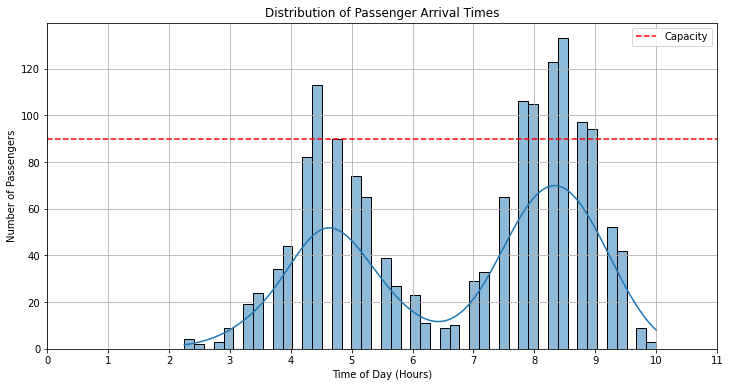

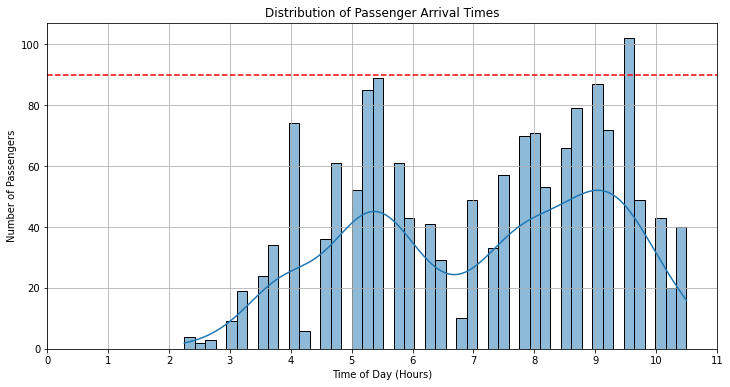

In [63]:
# Align ArrivalTime to the nearest duration-minute interval
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % (duration * 60))

# Plotting histograms
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['AlignedArrivalTime']/3600, bins=int(12*(60/duration)), kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=3*duration*2, color='red', linestyle='--', label='Capacity')
plt.legend()
plt.show()


passengers_data['new_AlignedArrivalTime'] = passengers_data['new_ArrivalTime'] - (passengers_data['new_ArrivalTime'] % (duration * 60))
# Plotting the distribution of new arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['new_AlignedArrivalTime']/3600, bins= int(12*(60/duration)), kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=3*duration*2, color='red', linestyle='--', label='Capacity')

# Suggestion system

In [40]:
flight_time_slots = {
    "BM2616": [4*3600, 5.25*3600],#Depature 05:45
    "XC6333": [5.25*3600, 5.5*3600], #Depature 06:00
    "OO2037": [5.25*3600, 5.5*3600, 5.75*3600], #Depature 06:15
    "HP4524": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600], #Depature 06:30
    "DN7022": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600, 6.25*3600], #Depature 06:45
    
    "QX7315": [7*3600], #Depature 09:30
    "SS2446": [9.25*3600], #Depature 09:45
    "ZI1701": [9.25*3600, 9.5*3600], #Depature 10:00
    "HC1255": [9.25*3600, 9.5*3600, 9.75*3600], #Depature 10:15
    "HF1818": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600], #Depature 10:30
    "IG2596": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600, 10.25*3600] #Depature 10:45
}

expected_output = '''virtual_queue = [
    {"flights": "BM2616", "time_slots": [4*3600, 5.25*3600], "capacity":[?,?]}, #Depature 05:45
    {"flights": "XC6333", "time_slots": [5.25*3600, 5.5*3600],"capacity":[?,?]}, #Depature 06:00
    {"flights": "OO2037", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600], "capacity":[?,?,?]}, #Depature 06:15
    {"flights": "HP4524", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600],"capacity":[?,?,?,?]}, #Depature 06:30
    {"flights": "DN7022", "time_slots": [5.25*3600, 5.5*3600, 5.75*3600, 6*3600, 6.25*3600],"capacity":[?,?,?,?,?]}, #Depature 06:45

    {"flights": "QX7315", "time_slots": [7*3600], "capacity":[?]}, #Depature 09:30
    {"flights": "SS2446", "time_slots": [9.25*3600], "capacity":[?]}, #Depature 09:45
    {"flights": "ZI1701", "time_slots": [9.25*3600, 9.5*3600], "capacity":[?,?]}, #Depature 10:00
    {"flights": "HC1255", "time_slots": [9.25*3600, 9.5*3600, 9.75*3600], "capacity":[?,?,?]}, #Depature 10:15
    {"flights": "HF1818", "time_slots": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600], "capacity":[?,?,?,?]}, #Depature 10:30
    {"flights": "IG2596", "time_slots": [9.25*3600, 9.5*3600, 9.75*3600, 10*3600, 10.25*3600], "capacity":[?,?,?,?,?]} #Depature 10:45
]'''

In [56]:
# Simplified algorithm to allocate passengers to time slots based on 'Time'

def allocate_flight_passengers(flight, time_slots, peak_data):
    allocations = {slot: 0 for slot in time_slots}  # Initialize allocations
    
    for slot in time_slots:
        available_capacity = peak_data.loc[peak_data['Time'] == slot, 'IdleCapacity'].values[0]
        
        for _, row in peak_data.iterrows():
            if row['Time'] == slot:
                continue
                
            if available_capacity > 0:
                passengers_to_allocate = available_capacity
                allocations[slot] += passengers_to_allocate
                available_capacity -= passengers_to_allocate
            

                # Update peak_data to reflect the allocation
                peak_data.loc[peak_data['Time'] == row['Time'], 'ArrivalCount'] -= passengers_to_allocate
                peak_data.loc[peak_data['Time'] == row['Time'], flight] -= passengers_to_allocate
                peak_data.loc[peak_data['Time'] == slot, 'ArrivalCount'] +=  passengers_to_allocate
                peak_data.loc[peak_data['Time'] == slot, flight] +=  passengers_to_allocate
               
                if available_capacity <= 0:
                    break
    
    peak_data["ExcessPassengers"] = peak_data.apply(lambda row: max(row['ArrivalCount'] - row["SecurityCapacity"], 0), axis=1)
    peak_data["IdleCapacity"] = peak_data.apply(lambda row: max(row["SecurityCapacity"] - row['ArrivalCount'], 0), axis=1)
    return allocations, peak_data


def generate_time_slots(start_time, end_time, duration):
    time_interval_seconds = int(duration * 60)
    return list(range(int(start_time), int(end_time), int(time_interval_seconds)))
                      
def adjust_peak_period_start_end(duration):
    #Peak period 1: 04:15 - 05:15
    peak_periods1_start = 4.25 * 60 * 60  
    peak_periods1_end = 5.25 * 60 * 60    
    
    #Peak period 2: 07:30 - 09:15
    peak_periods2_start = 7.5 * 60 * 60  
    peak_periods2_end = 9.25 * 60 * 60    
    
    if duration == 10:
        #Peak period 1: 04:10 - 05:20
        peak_periods1_start = (4 + 1/6) * 60 * 60
        peak_periods1_end = (5 + 1/3) * 60 * 60
        
        #Peak period 2: 07:30 - 09:20
        peak_periods2_start = 7.5 * 60 * 60  
        peak_periods2_end = (9 + 1/3) * 60 * 60
        
    return peak_periods1_start, peak_periods1_end, peak_periods2_start, peak_periods2_end        

def suggestion_virtual_queue(peak_data, duration):
    time_interval_seconds = duration*60
    
    # Initialize the virtual queue with capacity allocations
    virtual_queue = []
    
    peak_periods1_start, peak_periods1_end, peak_periods2_start, peak_periods2_end = adjust_peak_period_start_end(duration)
    
    flight_time_slots = {
        "BM2616": generate_time_slots(4*3600, peak_periods1_start, duration) + generate_time_slots(peak_periods1_end, 5.25*3600+1, duration),#Depature 05:45
        "XC6333": generate_time_slots(peak_periods1_end, 5.5*3600+1, duration), #Depature 06:00
        "OO2037": generate_time_slots(peak_periods1_end, 5.75*3600+1, duration), #Depature 06:15
        "HP4524": generate_time_slots(peak_periods1_end, 6*3600+1, duration), #Depature 06:30
        "DN7022": generate_time_slots(peak_periods1_end, 6.25*3600+1, duration), #Depature 06:45
    
        "QX7315": generate_time_slots(7*3600, peak_periods2_start, duration),#Depature 09:30
        "SS2446": generate_time_slots(peak_periods2_end, 9.25*3600+1, duration), #Depature 09:45
        "ZI1701": generate_time_slots(peak_periods2_end, 9.5*3600+1, duration), #Depature 10:00
        "HC1255": generate_time_slots(peak_periods2_end, 9.75*3600+1, duration), #Depature 10:15
        "HF1818": generate_time_slots(peak_periods2_end, 10*3600+1, duration), #Depature 10:30
        "IG2596": generate_time_slots(peak_periods2_end, 10.25*3600+1, duration) #Depature 10:45
    }
    
    # Process each flight
    for flight, slots in flight_time_slots.items():
        # Allocate passengers to time slots for this flight
        allocations, peak_data = allocate_flight_passengers(flight, slots, peak_data)

        # Add to virtual queue
        virtual_queue.append({"flights": flight, "time_slots": slots, "capacity": list(allocations.values())})
    
    return virtual_queue

In [57]:
duration = 15
peak_data = get_peak_data_flights_info(passengers_data, security_data, duration)
virtual_queue = suggestion_virtual_queue(peak_data, duration)
virtual_queue

[{'flights': 'BM2616', 'time_slots': [14400, 18900], 'capacity': [46, 25]},
 {'flights': 'XC6333', 'time_slots': [18900, 19800], 'capacity': [0, 51]},
 {'flights': 'OO2037',
  'time_slots': [18900, 19800, 20700],
  'capacity': [0, 0, 63]},
 {'flights': 'HP4524',
  'time_slots': [18900, 19800, 20700, 21600],
  'capacity': [0, 0, 0, 22]},
 {'flights': 'DN7022',
  'time_slots': [18900, 19800, 20700, 21600, 22500],
  'capacity': [0, 0, 0, 0, 34]},
 {'flights': 'QX7315', 'time_slots': [25200, 26100], 'capacity': [16, 12]},
 {'flights': 'SS2446', 'time_slots': [33300], 'capacity': [38]},
 {'flights': 'ZI1701', 'time_slots': [33300, 34200], 'capacity': [0, 48]},
 {'flights': 'HC1255',
  'time_slots': [33300, 34200, 35100],
  'capacity': [0, 0, 81]},
 {'flights': 'HF1818',
  'time_slots': [33300, 34200, 35100, 36000],
  'capacity': [0, 0, 0, 42]},
 {'flights': 'IG2596',
  'time_slots': [33300, 34200, 35100, 36000, 36900],
  'capacity': [0, 0, 0, 0, 45]}]

In [54]:
warnings.filterwarnings("ignore")
duration = 10
passengers_data = pd.read_csv('passengers_0.csv').sort_values(by='ArrivalTime')
security_data = pd.read_csv('security.csv')
flights_data = pd.read_csv('flights.csv')

peak_data = get_peak_data_flights_info(passengers_data, security_data, duration)
virtual_queue = suggestion_virtual_queue(peak_data, duration)
passengers_data = pd.merge(passengers_data, flights_data, left_on='FlightNumber', right_on='FlightNumber', how='left')
passengers_data = process_virtual_queue(passengers_data, security_data, virtual_queue, duration)

passengers_data[passengers_data["Priority"]==1]


,Id,ArrivalTime,FlightNumber,AlignedArrivalTime,DepartureTime,Passengers,new_ArrivalTime,Priority
140,BRHZMXK73XTF4A6KKD7T,15308.084282,XC6333,15000.0,21600,130,19756.926232,1
141,MP6NF9BFZIBJ7KC94IQQ,15315.905182,BM2616,15000.0,20700,80,14631.192926,1
142,DRV9I4D1ATNTUFBJWCN1,15318.430889,BM2616,15000.0,20700,80,14572.432880,1
143,BKNUYD2FK4QOPBSPKO07,15335.937263,BM2616,15000.0,20700,80,14793.671415,1
146,X39VCLOQX7DZP03KQPL6,15383.934083,DN7022,15000.0,24300,193,22752.534495,1
...,...,...,...,...,...,...,...,...
1384,BONKYL7G4QASE9KRC5CM,32526.042473,HF1818,32400.0,37800,87,36157.153006,1
1389,LEZF22JGR1A9UTQFDC3N,32616.470873,HF1818,32400.0,37800,87,36384.417443,1
1393,2UQUG2V78HZHF01E950X,32671.016390,HF1818,32400.0,37800,87,36119.841658,1
1410,A1VLT0YGWX1FOZSMDA5F,32811.796634,IG2596,32400.0,38700,153,36824.295406,1


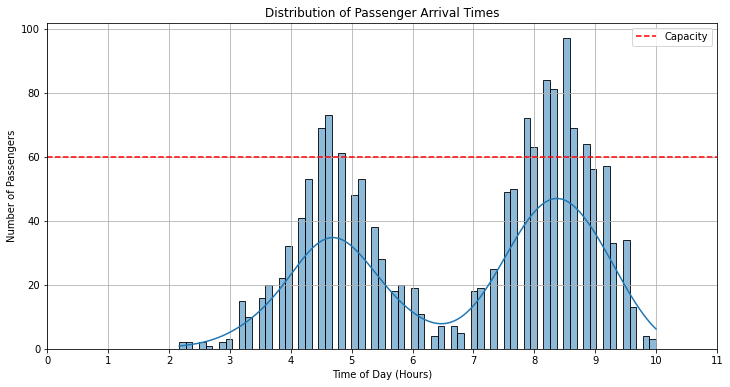

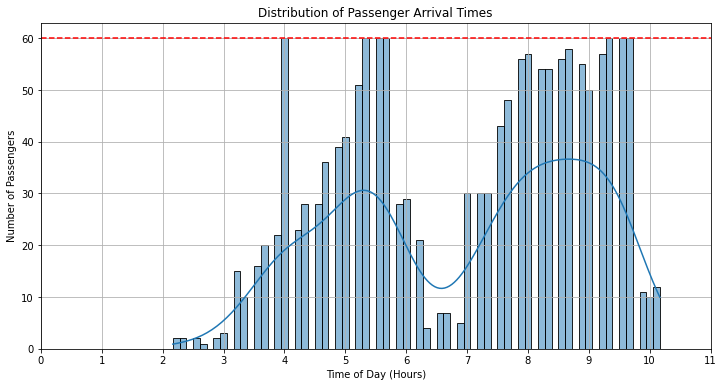

In [55]:
# Align ArrivalTime to the nearest 1duration-minute interval
passengers_data['AlignedArrivalTime'] = passengers_data['ArrivalTime'] - (passengers_data['ArrivalTime'] % (duration * 60))

# Plotting histograms
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['AlignedArrivalTime']/3600, bins=int(12*(60/duration)), kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=3*duration*2, color='red', linestyle='--', label='Capacity')
plt.legend()
plt.show()


passengers_data['new_AlignedArrivalTime'] = passengers_data['new_ArrivalTime'] - (passengers_data['new_ArrivalTime'] % (duration * 60))
# Plotting the distribution of new arrival times
plt.figure(figsize=(12, 6))
sns.histplot(passengers_data['new_AlignedArrivalTime']/3600, bins= int(12*(60/duration)), kde=True)
plt.title('Distribution of Passenger Arrival Times')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Number of Passengers')
plt.xticks(range(0, 12))
plt.grid(True)
plt.axhline(y=3*duration*2, color='red', linestyle='--', label='Capacity')